In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import required libraries
from util.plot_stream import PlotStream
import os

ModuleNotFoundError: No module named 'util.plot_stream'

In [ ]:
source_dir = "data/benchmark/ECG" # directory for source streams
drift_dir = "data/synthetic/p_drift/p80" # directory for drift stream
filename = 'ECG_grad_p79_n23_b48'
s1 = PlotStream(source_dir, drift_dir, filename)

### View All Source and Drift Streams

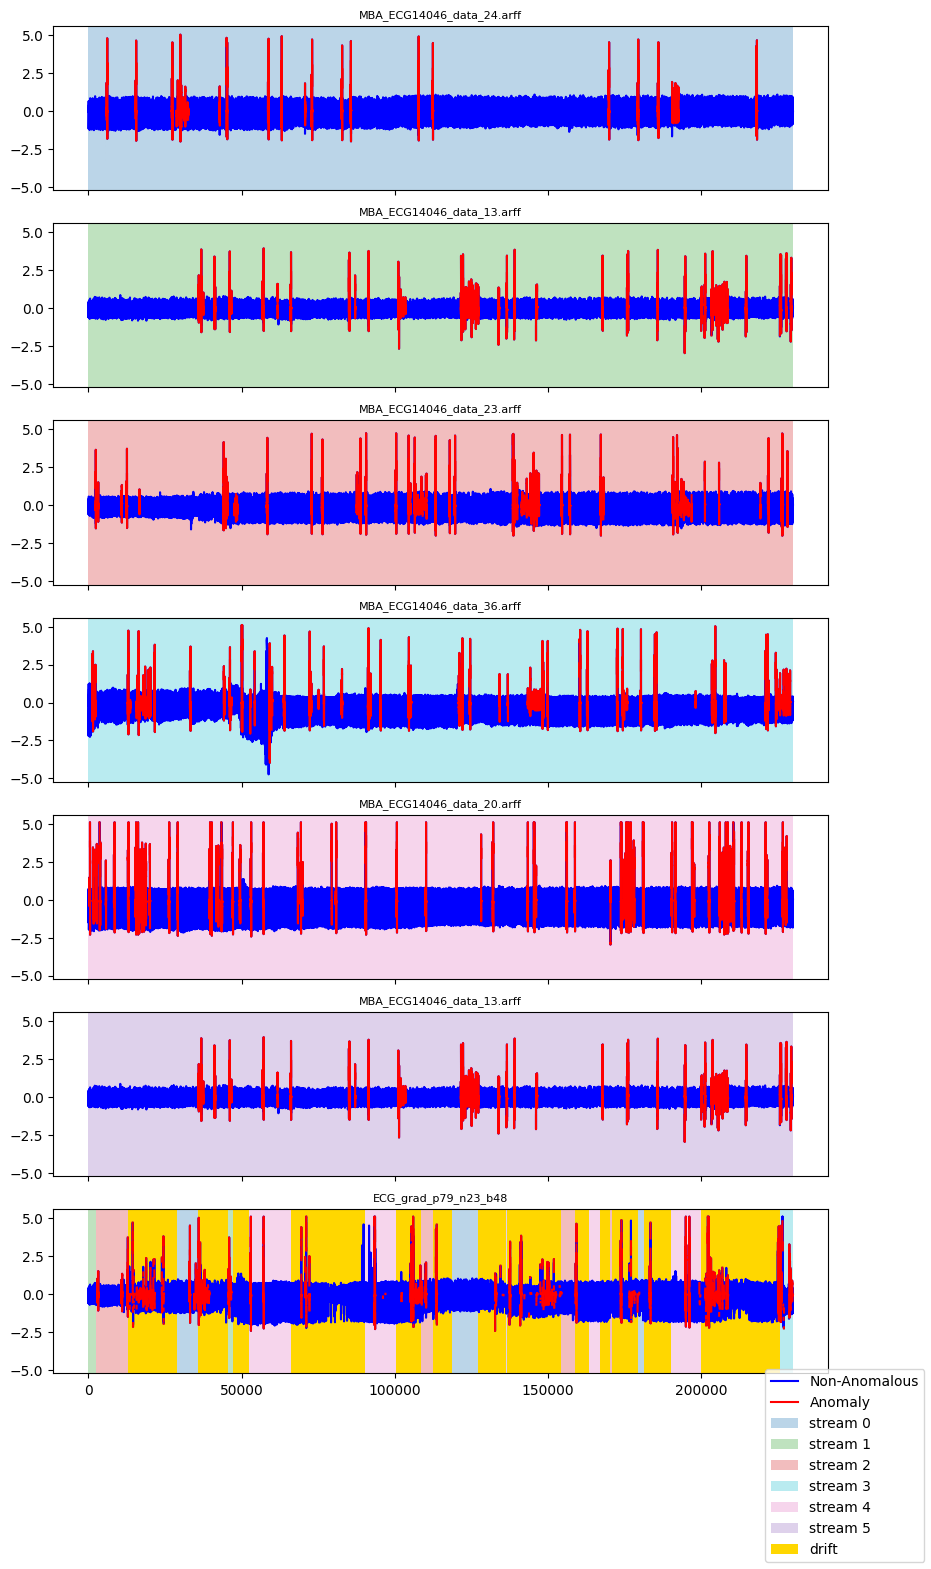

In [ ]:
# plot all source streams, full interval
s1.plot_all()

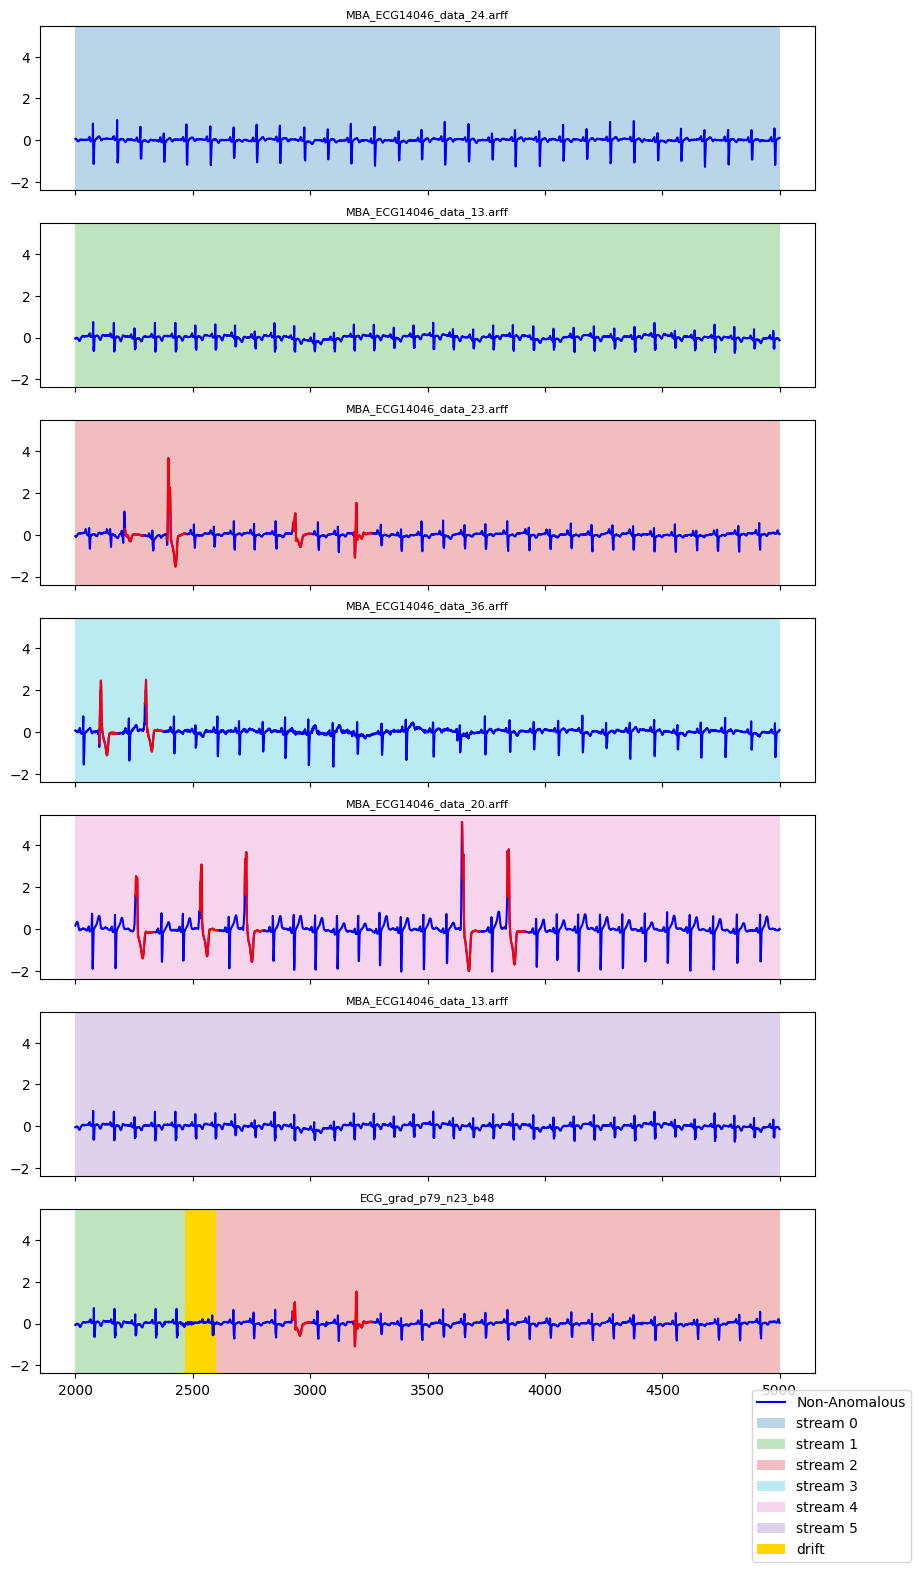

In [ ]:
# plot all source streams, within specified interval
s1.plot_all(start=2000,end=5000)

In [ ]:
# plot all source and drift streams within an interval relative to center positions of drifts
j = 39
s1.plot_all(s1.positions[j]-1000, s1.positions[j+1]+1000)

In [ ]:
# plot only drift stream within interval relative to center positions of drifts
j = 39
s1.plot_drift(s1.positions[j]-500, s1.positions[j+1]+500)

10


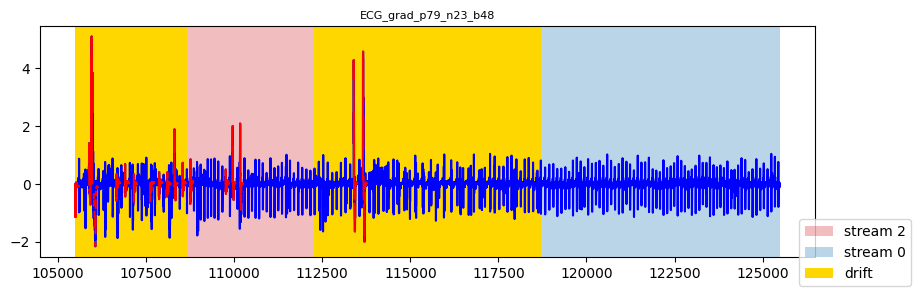

In [ ]:
# plot the kth anomaly with default width=1000
k = 10
print(k)
s1.plot_anomaly_k(k, w=10000)

10


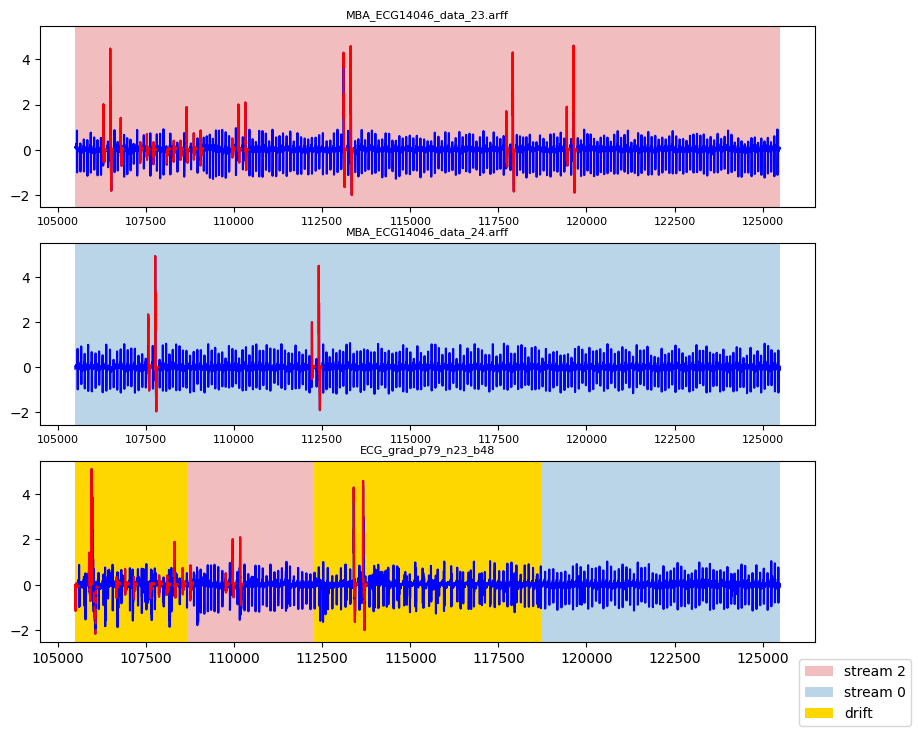

In [ ]:
# plot the kth anomaly and source streams for that drift
k = 10
print(k)
s1.plot_anomaly_k_with_source(k, 10000)

9


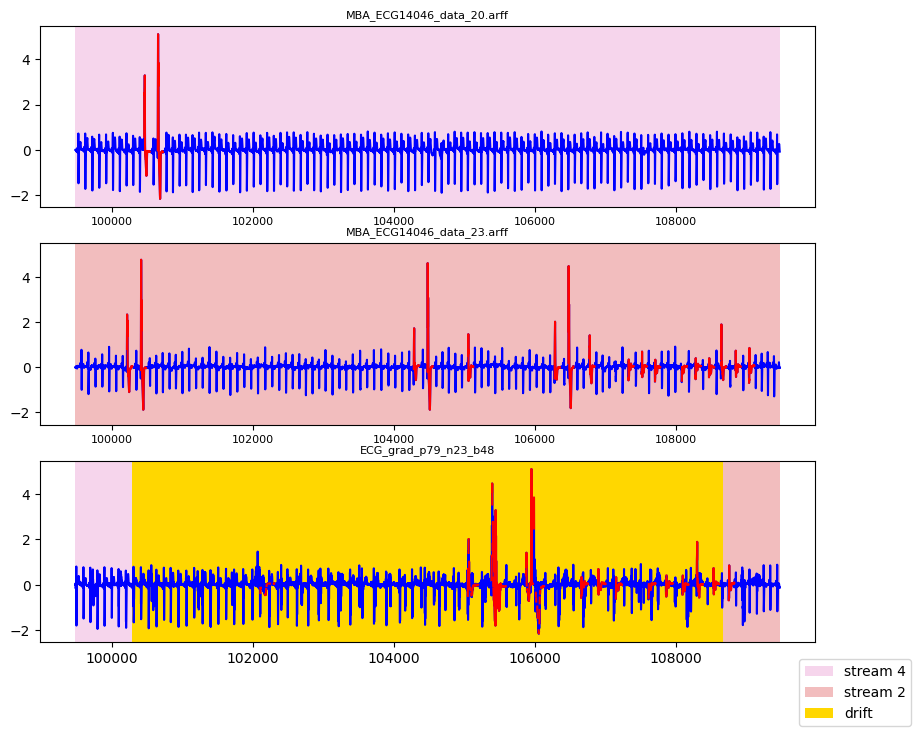

In [ ]:
# generate plot similar to previous cell, iterating through anomalies in stream
k -= 1
print(k)
s1.plot_anomaly_k_with_source(k, 5000)